In [1]:
# Warmup 0: What does a variable store?
x = 1
# Answer: It stores a reference to an object.
#         More precisely, it stores the memory address of that object.

In [2]:
# Warmup 1a:  Use 'in' to determine if something is in my_list
my_list = ["meet", "me",  "after", 84]
print("me" in my_list)
print(84 in my_list)

True
True


In [3]:
# Warmup 1b: What about this list? 
my_list = [11, "meet", ["me", "them", "us"],  [84,19, 22], "school", 2.54]
print("meet" in my_list)
print(84 in my_list)

True
False


In [4]:
# Warmup 2a: Write a function to find a thing in a list that may have lists in it
my_list = [11, "meet", ["me", "them", "us"],  [84,19, 22], "school", 2.54]
def search_list_depth2(target, some_list):
    ''' returns True if thing in some_list, False otherwise'''
    for list_item in some_list:
        if target == list_item:
            return True
        elif type(list_item) == list and target in list_item:
            return True
    return False  # after all possible searching....not found
                
print(search_list_depth2("school", my_list))  # in list
print(search_list_depth2(22, my_list))        # in nested list
print(search_list_depth2("house", my_list))   # not anywhere


True
True
False


In [5]:
# Warmup 2b: Will our function work on this list?  Guess:
list_3_deep = [22, [33, 44, [55, 66], 77 ], 88]

# let's try it with our previous function
print(search_list_depth2(22, list_3_deep))  # in list
print(search_list_depth2(99, list_3_deep))  # not in list

# Write other tests to be sure that it works
print(search_list_depth2(33, list_3_deep))  # in nested list
print(search_list_depth2(55, list_3_deep))  # in nested nested list

True
False
True
False


In [6]:
# Warmup 2c: What about ANY depth list? 
# That is the goal of today's lecture

list_3_deep = [22, [33, 44, [55, 66], 77 ], 88]

def search_list_depth_any(target, some_list):
    ''' returns True if thing in some_list, False otherwise'''
    for list_item in some_list:
        if target == list_item:
            return True
        elif type(list_item) == list:
            is_in_next = search_list_depth_any(target, list_item)
            if is_in_next:
                return True
    return False  # after all possible searching....not found

search_list_depth_any(55, list_3_deep)

True

### Lecture 22: Recursion

After today's Lecture you will be able to: 

Define recursion and be able to identify
- the base case
- the recursive case
- infinite recursion

Explain why the following can be recursively defined
- lists
- dictionaries

Trace a recursive function
- involving numeric computation
- involving nested data structures


## What is Recursion?
Recursion is defined as the process of defining something in terms of itself. 

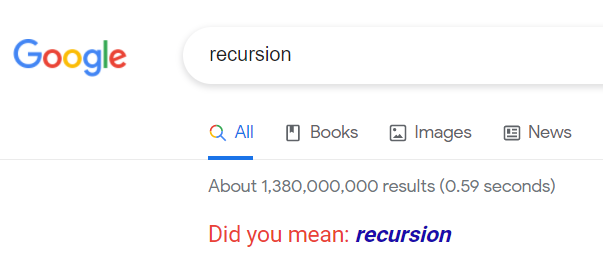

### Define recursion and be able to identify 
- the base case
- the recursive case
- infinite recursion

In [7]:
# In math, you can define the factorial of a number in terms of the number before it. 
# Q: What is the value of 84!
# A: 84 * 83!

# What are we still missing?
# A: 0! = 1

### A recursive algorithm must have 2 parts:
- the base case....which stops the recursion
- the recursive case...which defines the same process in a smaller way

#### If there is no base case what happens in the above example? 
- recursion never ends......infinite recursion
- infinite recursion can also happen if the recursive case does not move towards the base

### Writing Definitions Recursively

In [8]:
# Define the sequence 1, 3, 5, 7, 9, 11... recursively
# Base Case: seq_0 = 1
# Recursive Case: seq_n = seq_(n - 1) + 2

In [9]:
# Define whether a positive number is odd recursively
# Base Case: 1 is odd
# Recursive Case: True if (n - 2) is odd, False otherwise

### Writing Recursive Code

In [10]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n - 1)

print(factorial(0))
print(factorial(3))
print(factorial(6))

1
6
720


### Write and try `is_odd` in PythonTutor

In [11]:
def is_odd(n):
    if n == 1:
        return True
    elif n <= 0:
        return False
    else:
        num_is_odd = is_odd(n - 2)
        return num_is_odd
    
is_odd(7)

True

### Can we write them iteratively instead?

In [12]:
def factorial_itr(n):
    prod = 1
    for i in range(1, n + 1):
        prod *= i
    return prod

print(factorial_itr(0))
print(factorial_itr(3))
print(factorial_itr(6))

1
6
720


### Other Recursive Problems
Go back and complete Warmup 2.C

In [13]:
# The Collatz Conjecture problem 
# Conjecture: Any positive integer n, put through the below equation
#             will always converge to 1.
#
# https://en.wikipedia.org/wiki/Collatz_conjecture
# https://www.youtube.com/watch?v=5mFpVDpKX70
# US$500 for solving. And likely an honorary doctorate.
# Run this in Python Tutor on your own

def collatz(n):
    if n == 1:
        return 1 # base case
    elif n % 2 == 0:
        return collatz(n//2)
    else:
        return collatz (3*n+1)

collatz(13)   # try other numbers


1

### Trace a recursive function involving nested data structures

In [14]:
# example 4

fav_stuff = [  "road bike",
    ["PB&J", "brownies", "spaghetti", "apples"] , 
             ("Brooks Ghost 13", "hoodie", "gloves"), 
             "macbook air", 
             [ "Johndee.com", "https://www.weather.gov/mkx/"],
             ["A", "K", ("S", "D", "K")]
            ]
        
print ("road bike" in fav_stuff)
print ("brownies" in fav_stuff)   # Why is this False? 

True
False


In [15]:
# Write a recursive function to search *ANY* list of lists/tuples for a given word
# Modify your code from Warmup 2.C
def search_list_recursive(target, some_list):
    ''' returns True if thing in some_list, False otherwise'''
    for list_item in some_list:
        if target == list_item:
            return True
        elif type(list_item) == list or type(list_item) == tuple:
            is_in_next = search_list_recursive(target, list_item)
            if is_in_next:
                return True
    return False  # after all possible searching....not found

print(search_list_recursive("apples", fav_stuff))
print(search_list_recursive("D", fav_stuff))
print(search_list_recursive("road bike", fav_stuff))
print(search_list_recursive("pizza", fav_stuff))


True
True
True
False


In [16]:
# write a function that prints nested lists with indenting
# 
def print_with_indenting(directory, indent_level):
    for thing in directory:
        if type(thing) == list or type(thing) == tuple:
            print("\t" * indent_level + str(type(thing)))
            print_with_indenting(thing, indent_level + 1)
        else:
            print("\t" * indent_level + str(thing))
        
print_with_indenting(fav_stuff, 0)

road bike
<class 'list'>
	PB&J
	brownies
	spaghetti
	apples
<class 'tuple'>
	Brooks Ghost 13
	hoodie
	gloves
macbook air
<class 'list'>
	Johndee.com
	https://www.weather.gov/mkx/
<class 'list'>
	A
	K
	<class 'tuple'>
		S
		D
		K


### Dictionaries can have a recursive structure
As can...
- lists
- dictionaries
- JSON objects

In [17]:
ancestry = {
    "name": "Evan",
    "age": 26,
    "born": "Sheboygan",
    "parent": {
        "name": "Dean",
        "age": 51,
        "born": "Milwaukee",
        "parent": {
            "name": "Mike",
            "age": 72,
            "born": "Racine",
            "parent": {
                "name": "Bill",
                "age": 90,
                "born": "La Crosse"
            }
        }
    }
}

In [18]:
# let's try to search through a deep dictionary. 
def find_place_of_birth(target_name, ancestry_history):
    if ancestry_history['name'] == target_name:  # base case
        return ancestry_history['born']
    else:
        if 'parent' in ancestry_history:
             return find_place_of_birth(target_name, ancestry_history['parent'])        
    return "Unknown!"

find_place_of_birth("Evan", ancestry)

'Sheboygan'

In [19]:
# Extra practice...can you predict the outcome?
# run this on your own in Python Tutor

def mystery(a, b): 
# precondition: a > 0 and b > 0
    if b == 1: 
        return a;
    return a * mystery( a, b - 1 )

# make a function call here
mystery(7, 5)

16807